# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
import pandas as pd
import numpy as np
import kaggle
import matplotlib.pyplot as plt


## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:*

TMDB (The Movie Database) and IMDB (Internet Movie Database) are both databases and websites related to movies. I want to comprehensively analyze the relationship between the ratings of the two and time, and briefly discuss the relationship between the ratings of the two. I have collected data set from the Google Dataset Search https://datasetsearch.research.google.com/. The keyword is a "movie".

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File.

Reason: This dataset records the movie assessment from TMDB which is one of the most famous movie assess campanies. This is useful to compare scores from different sources and to assess movie quality objectively.

Method: The data was gathered using the "Downloading files" method from kaggle source. https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

Dataset variables:

*   title_x: The movie title.
*   popularity: The popularity index.
*   vote_average: The score from TMDB.
*   vote_count: The number of voting.
*   release_date: Movie release date.

In [2]:
credits = pd.read_csv(r'C:\Users\YuqiZhang\Documents\udacity\Data analyst\2\tmdb_5000_credits.csv')
movies = pd.read_csv(r'C:\Users\YuqiZhang\Documents\udacity\Data analyst\2\tmdb_5000_movies.csv')
data_source1 = pd.merge(movies, credits, left_on='id', right_on='movie_id')
data_source1.columns.unique()

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [4]:
data_1 = []
for i in range(np.array(data_source1["title_x"]).shape[0]):
    data_ = []
    data_.append(data_source1["title_x"][i])
    data_.append(data_source1["popularity"][i])
    data_.append(data_source1["vote_average"][i])
    data_.append(data_source1["vote_count"][i])
    data_.append(data_source1["release_date"][i])
    data_1.append(data_)
columns = ['title_x', 'popularity', 'vote_average', 'vote_count', 'release_date']
data_1 = pd.DataFrame(data_1, columns = columns)
print(data_1)

                                       title_x  popularity  vote_average  \
0                                       Avatar  150.437577           7.2   
1     Pirates of the Caribbean: At World's End  139.082615           6.9   
2                                      Spectre  107.376788           6.3   
3                        The Dark Knight Rises  112.312950           7.6   
4                                  John Carter   43.926995           6.1   
...                                        ...         ...           ...   
4798                               El Mariachi   14.269792           6.6   
4799                                 Newlyweds    0.642552           5.9   
4800                 Signed, Sealed, Delivered    1.444476           7.0   
4801                          Shanghai Calling    0.857008           5.7   
4802                         My Date with Drew    1.929883           6.3   

      vote_count release_date  
0          11800   2009-12-10  
1           4500   2007

#### Dataset 2

Type: CSV File.

Reason: This dataset records the movie assessment from IMDB which is one of the most famous movie assess campanies. This is useful to compare scores from different sources and to assess movie quality objectively.

Method: The data was gathered using the "API" method from Kaggle source. The API Command is "kaggle datasets download -d carolzhangdc/imdb-5000-movie-dataset". Input this API Command into Anaconda Prompt to download the dataset.

Dataset variables:

*   movie_title: The movie title.
*   imdb_score: The score from IMDB.

In [5]:
#FILL IN 2nd data gathering and loading method
data_source2 = pd.read_csv(r'C:\Users\YuqiZhang\Documents\udacity\Data analyst\2\movie_metadata.csv')
data_source2.columns.unique()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data_2 = []
for i in range(np.array(data_source2).shape[0]):
    data_ = []
    data_.append(data_source2["movie_title"][i].replace("\xa0", ""))
    data_.append(data_source2["imdb_score"][i])
    data_2.append(data_)
columns = ['movie_title', 'imdb_score']
data_2 = pd.DataFrame(data_2, columns = columns)
print(data_2)

                                            movie_title  imdb_score
0                                                Avatar         7.9
1              Pirates of the Caribbean: At World's End         7.1
2                                               Spectre         6.8
3                                 The Dark Knight Rises         8.5
4     Star Wars: Episode VII - The Force Awakens    ...         7.1
...                                                 ...         ...
5038                            Signed Sealed Delivered         7.7
5039                          The Following                     7.5
5040                               A Plague So Pleasant         6.3
5041                                   Shanghai Calling         6.3
5042                                  My Date with Drew         6.6

[5043 rows x 2 columns]


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

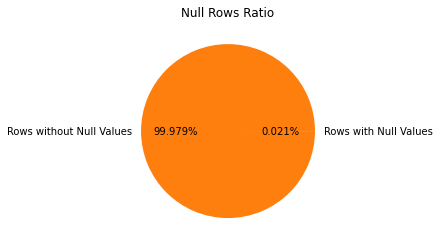

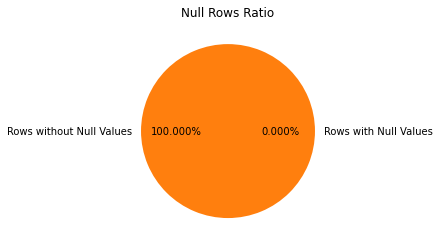

In [7]:
# Completeness: Are there some NULL?
#FILL IN - Inspecting the dataframe visually

def has_null_visually(data):
    null_rows_ratio = data.isnull().any(axis=1).mean()

    non_null_rows_ratio = 1 - null_rows_ratio

    labels = ['Rows with Null Values', 'Rows without Null Values']
    sizes = [null_rows_ratio, non_null_rows_ratio]
    plt.pie(sizes, labels=labels, autopct='%1.3f%%')
    plt.title('Null Rows Ratio')

    plt.show()
has_null_visually(data_1)   
has_null_visually(data_2)   

In [9]:
#FILL IN - Inspecting the dataframe programmatically
def has_null_programmatically(data):
    has_null = data.isnull().any().any()

    if has_null:
        print("The dataset has Null")
    else:
        print("The dataset isn't have Null")
has_null_programmatically(data_1)
has_null_programmatically(data_2)

The dataset has Null
The dataset isn't have Null


Issue and justification: FILL IN

Check whether NULL there are. If so, delete the rows which have NULL.

### Quality Issue 2:

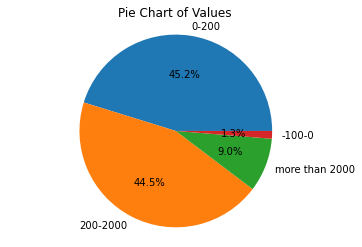

In [10]:
#Accuracy: Are some values less than 0
#FILL IN - Inspecting the dataframe visually
def accuracy_visually(data):
    thresholds = [-100, 0, 200, 2000, float('inf')]
    labels = ['-100-0', '0-200', '200-2000', 'more than 2000']

    # 根据分类阈值进行分组
    groups = pd.cut(data, bins=thresholds, labels=labels)

    # 统计每个组的数量
    group_counts = groups.value_counts()

    # 画出饼图
    plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
    plt.title('Pie Chart of Values')
    plt.axis('equal')
    plt.show()
accuracy_visually(data_1['vote_count'])

In [11]:
#FILL IN - Inspecting the dataframe programmatically
def accuracy_programmatically(data):
    has_negative = (data <= 0).any()

    # 输出结果
    if has_negative:
        print("There are values in vote_count less than 0")
    else:
        print("There aren't values in vote_count less than 0")
accuracy_programmatically(data_1['vote_count'])

There are values in vote_count less than 0


Issue and justification: FILL IN

Because "title_x" is the primary key of the dataset, The values of "title_x" can't have duplicate values. In the Justification part, duplicate values will be delete.

### Tidiness Issue 1:

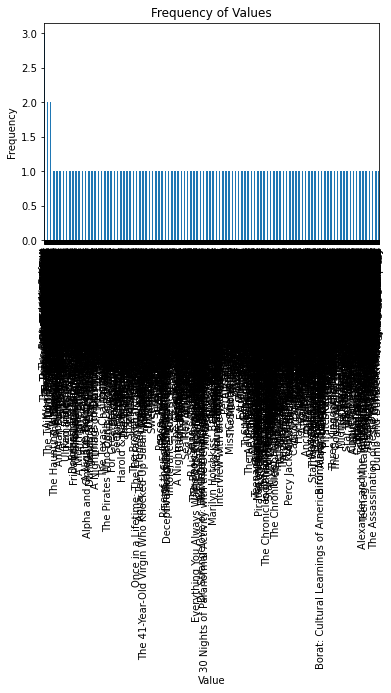

In [12]:
# Uniqueness: Are there some duplicate values in the colume of primary key?
#FILL IN - Inspecting the dataframe visually
def Uniqueness_visually(data):
    value_counts = data.value_counts()

    # 绘制柱状图
    value_counts.plot.bar()

    # 设置图形属性
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Frequency of Values')

    # 显示图形
    plt.show()
Uniqueness_visually(data_2['movie_title'])

In [13]:
#FILL IN - Inspecting the dataframe programmatically
def Uniqueness_programmatically(data):
    has_duplicates = data.duplicated(keep=False).any()

    if has_duplicates:
        print("There are duplicate values in the dataset")
    else:
        print("There are not duplicate values in the dataset")
Uniqueness_programmatically(data_2['movie_title'])

There are duplicate values in the dataset


Issue and justification: FILL IN

Because "movie_title" is the primary key of the data_2 and each row corresponds to a unique record, The values of "movie_title" can't have duplicate values.  In the Justification part, duplicate values will be delete.

### Tidiness Issue 2:

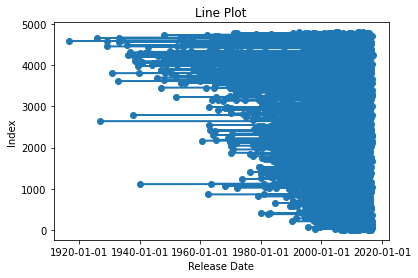

In [15]:
# Consistency: Is the date divided into three columns: year, month and day?
#FILL IN - Inspecting the dataframe visually
# 将 release_date 列转换为日期类型
a = pd.to_datetime(data_1['release_date'])

# 添加序号列
b = range(1, len(data_1) + 1)

# 绘制折线图
plt.plot(a, b, marker='o')

# 设置横轴标签和标题
plt.xlabel('Release Date')
plt.ylabel('Index')
plt.title('Line Plot')

# 设置横轴日期格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 显示图形
plt.show()

In [16]:
#FILL IN - Inspecting the dataframe programmatically
data_1['release_date'].head(2)

0    2009-12-10
1    2007-05-19
Name: release_date, dtype: object

Issue and justification: FILL IN

data_1['release_date'] records the date. For better data analysis, it should be split into three columns: year, month and day.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [17]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
data_1_copy = data_1
data_2_copy = data_2

### **Quality Issue 1: Completeness: Are there some NULL?**

In [18]:
# FILL IN - Apply the cleaning strategy
def has_null_Justification(data):
    data.dropna(inplace=True)
has_null_Justification(data_1_copy)

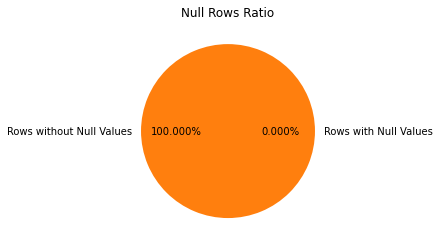

In [19]:
# FILL IN - Validate the cleaning was successful
has_null_visually(data_1_copy) 

Justification: *FILL IN*

Delete the rows which have NULL. The result shows there is no rows with null values.

### **Quality Issue 2: Accuracy: Are some values less than 0**

In [20]:
#FILL IN - Apply the cleaning strategy
data_1_copy = data_1_copy.drop(data_1_copy[data_1_copy['vote_count'] <= 0].index)

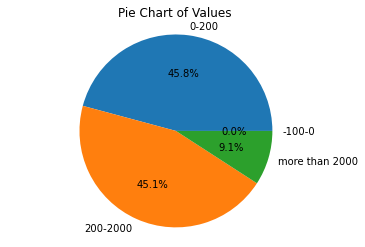

In [21]:
#FILL IN - Validate the cleaning was successful
accuracy_visually(data_1_copy['vote_count'])

Justification: *FILL IN*

I delete the rows which vote_count is negetive. The result shows there is no negetive value in dataset data_1.

### **Tidiness Issue 1: Uniqueness: Are there some duplicate values in the colume of primary key?**

In [22]:
#FILL IN - Apply the cleaning strategy
data_2_copy = data_2_copy[~data_2_copy['movie_title'].duplicated(keep='first')]

In [23]:
#FILL IN - Validate the cleaning was successful
Uniqueness_programmatically(data_2_copy['movie_title'])

There are not duplicate values in the dataset


Justification: *FILL IN*

For the duplicate values in the primary key, the deletion process is performed, and the result shows that there is no duplicate value in the primary key in data_2_copy, that is, each row corresponds to a unique record

### **Tidiness Issue 2: Consistency: Is the date divided into three columns: year, month and day?**

In [24]:
#FILL IN - Apply the cleaning strategy
def date_to_YMD(data,date_column):
    data[['year', 'month', 'day']] = data[date_column].str.split('-', expand=True)
    data['year'] = pd.to_numeric(data['year'])
    data['month'] = pd.to_numeric(data['month'])
    data['day'] = pd.to_numeric(data['day'])

    # 删除原始日期列
    data.drop(date_column, axis=1, inplace=True)
date_to_YMD(data_1_copy, 'release_date')

In [25]:
#FILL IN - Validate the cleaning was successful
# print(data_1_copy['release_date'].head(2))
print(data_1_copy['year'].head(2))
print(data_1_copy['month'].head(2))
print(data_1_copy['day'].head(2))

0    2009
1    2007
Name: year, dtype: int64
0    12
1     5
Name: month, dtype: int64
0    10
1    19
Name: day, dtype: int64


Justification: *FILL IN*

I split the time column and converted it into three columns of year, month and day.The result shows the values in three columns.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [26]:
#FILL IN - Remove unnecessary variables and combine datasets

# Remove unnecessary variables
data_1_copy.drop("day", axis=1, inplace=True)


In [28]:
# combine cleaned datasets
data_cleaned = pd.merge(data_1_copy, data_2_copy, left_on='title_x', right_on='movie_title')
data_cleaned.head(2)

,title_x,popularity,vote_average,vote_count,year,month,movie_title,imdb_score
0,Avatar,150.437577,7.2,11800,2009,12,Avatar,7.9
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,2007,5,Pirates of the Caribbean: At World's End,7.1


In [29]:
# combine raw datasets
data_raw = pd.merge(data_1, data_2, left_on='title_x', right_on='movie_title')
data_raw.head(2)

,title_x,popularity,vote_average,vote_count,release_date,movie_title,imdb_score
0,Avatar,150.437577,7.2,11800,2009-12-10,Avatar,7.9
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,2007-05-19,Pirates of the Caribbean: At World's End,7.1


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [128]:
#FILL IN - saving data
data_cleaned.to_csv('clean_data_movie_TMDB&IMDB.csv', index=False)
data_raw.to_csv('raw_data_movie_TMDB&IMDB.csv.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

(1) How are Popularity, IMDB ratings, and TMDB ratings related to month and year?

(2) What is the relationship between IMDB ratings and TMDB ratings in different years?

monthly_stats=       popularity vote_average imdb_score
            mean         mean       mean
month                                   
1      13.981910     5.970255   6.181303
2      20.031288     6.070096   6.228617
3      21.373197     6.044286   6.258571
4      18.716872     6.038066   6.294864
5      26.101108     6.238261   6.450145
6      31.370483     6.198365   6.416621
7      28.503022     6.150720   6.392507
8      18.433816     5.994643   6.213265
9      17.005116     6.279099   6.608288
10     19.783432     6.268623   6.503837
11     28.708699     6.313269   6.612945
12     24.884711     6.457339   6.733028


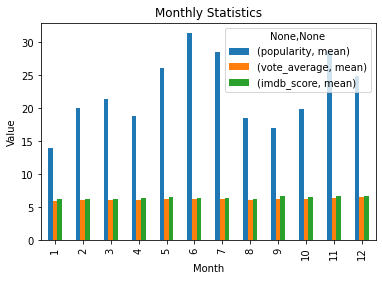

In [30]:
#Visual 1 - FILL IN
monthly_stats = data_cleaned.groupby('month').agg(['mean'])

# 提取前三列的统计值
stats_columns = ['popularity', 'vote_average', 'imdb_score']
monthly_stats = monthly_stats[stats_columns]
print("monthly_stats=",monthly_stats)

# 绘制月份柱状图
ax = monthly_stats.plot(kind='bar', y=['popularity', 'vote_average', 'imdb_score'],
                        title='Monthly Statistics')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
plt.show()

*Answer to research question:* FILL IN

Both IMDB ratings and TMDB ratings are stable. They have the largest value in December and the smallest value in January.

Popularity fluctuates greatly from month to month. The highest values were recorded in June, July and November, and the lowest values were recorded in January, April, August and September.

year_stats=      popularity vote_average imdb_score
           mean         mean       mean
year                                   
1925   0.785744     7.000000   8.300000
1927  32.351527     8.000000   8.300000
1929   1.396524     6.300000   7.150000
1930   8.484123     6.100000   7.800000
1932   1.199451     6.200000   6.600000
...         ...          ...        ...
2013  29.855343     6.211268   6.372770
2014  41.532466     6.014218   6.199052
2015  40.952758     5.904145   6.010363
2016  38.794902     5.930612   6.286735
2017   0.710870     7.400000   8.200000

[89 rows x 3 columns]


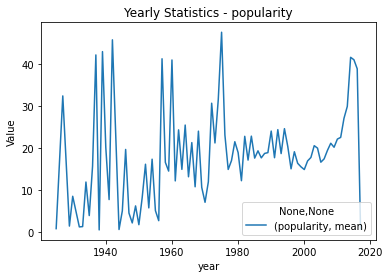

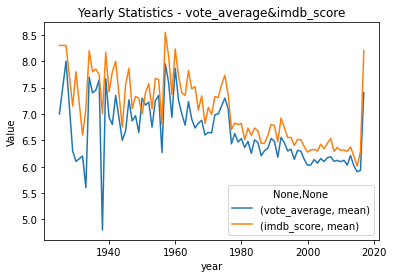

In [31]:
#Visual 2 - FILL IN
year_stats = data_cleaned.groupby('year').agg(['mean'])

# 提取前三列的统计值
year_stats = year_stats[stats_columns]
print("year_stats=",year_stats)

# 绘制月份柱状图
ax = year_stats.plot(kind='line', y=['popularity'],
                        title='Yearly Statistics - popularity')
ax.set_xlabel('year')
ax.set_ylabel('Value')
plt.show()
ax = year_stats.plot(kind='line', y=['vote_average', 'imdb_score'],
                        title='Yearly Statistics - vote_average&imdb_score')
ax.set_xlabel('year')
ax.set_ylabel('Value')
plt.show()

*Answer to research question:* FILL IN

There are clear peaks in Popularity, such as 1975, 1938-1942, and 2018.

The overall trend of IMDB ratings and TMDB ratings is the same, only the difference value changes slightly. To some extent, the two can replace each other.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN

If I had more time, I will (1) discuss the types of movies that audiences like best; (2) discuss which director and actor are the best pairing; (3) delete the maliciously rated movies reported in the news to make the results more objective.